In [1]:
import os
from ultralytics import NAS
os.chdir("..")
ROOT = os.getcwd()
print(ROOT)


/Users/mautushid/github/Cowsformer


In [2]:
from models.nas import *


The console stream is logged into /Users/mautushid/sg_logs/console.log


[2023-11-28 16:14:03] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-11-28 16:14:04] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-11-28 16:14:05] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2023-11-28 16:14:15] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-11-28 16:14:15] WARNING - export.py - Failed to import pytorch_quantization
[2023-11-28 16:14:15] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-11-28 16:14:15] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [3]:
### class inits and other inputs

path_model = 'yolo_nas_l' 
dir_train = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/train"
dir_val = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/val"
dir_test = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test"
name_task = "cow200"

data_yaml_path = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/data.yaml"
finetuned_model_path = "/Users/mautushid/github/Cowsformer/checkpoints_SML/n25_yolo_na_i1_exp_yolo_nas_l_25_1/ckpt_best.pth"

### Creating instance of Niche_YOLO_NAS class
my_nas = Niche_YOLO_NAS(path_model, dir_train, dir_val, dir_test, name_task)


[2023-11-28 16:14:19] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-11-28 16:14:19] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [4]:
### load finetuned model
best_model = my_nas.load(finetuned_model_path)

RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [5]:
my_nas.evaluate_trained_model(best_model, data_yaml_path, "test")

[2023-11-28 14:23:21] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.


model /Users/mautushid/github/Cowsformer/arc/checkpoints_old/n200_yolo_na_i1_trial100/ckpt_best.pth loaded


Testing:   0%|          | 0/14 [00:00<?, ?it/s][W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
Testing: 100%|██████████| 14/14 [07:00<00:00, 25.65s/it]

{'Precision@0.50': 0.8882793188095093,
 'Recall@0.50': 0.9498666524887085,
 'mAP@0.50': 0.9342725276947021,
 'F1@0.50': 0.9180412292480469,
 'Precision@0.50:0.95': 0.6955112218856812,
 'Recall@0.50:0.95': 0.743733286857605,
 'mAP@0.50:0.95': 0.7102336883544922,
 'F1@0.50:0.95': 0.7188143730163574}

Testing: 100%|██████████| 14/14 [07:10<00:00, 30.73s/it]
/Users/mautushid/miniconda3/envs/myenv/lib/python3.9/site-packages/numpy/lib/arraypad.py:487: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)
/Users/mautushid/miniconda3/envs/myenv/lib/python3.9/site-packages/torch/amp/autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
[2023-11-28 14:30:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2023-11-28 14:30:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deac

Confusion Matrix: [[        400         785]
 [        334           0]]


ConfusionMatrix(matrix=array([[        400,         785],
       [        334,           0]]), num_classes=1, conf_threshold=0.5, iou_threshold=0.5)

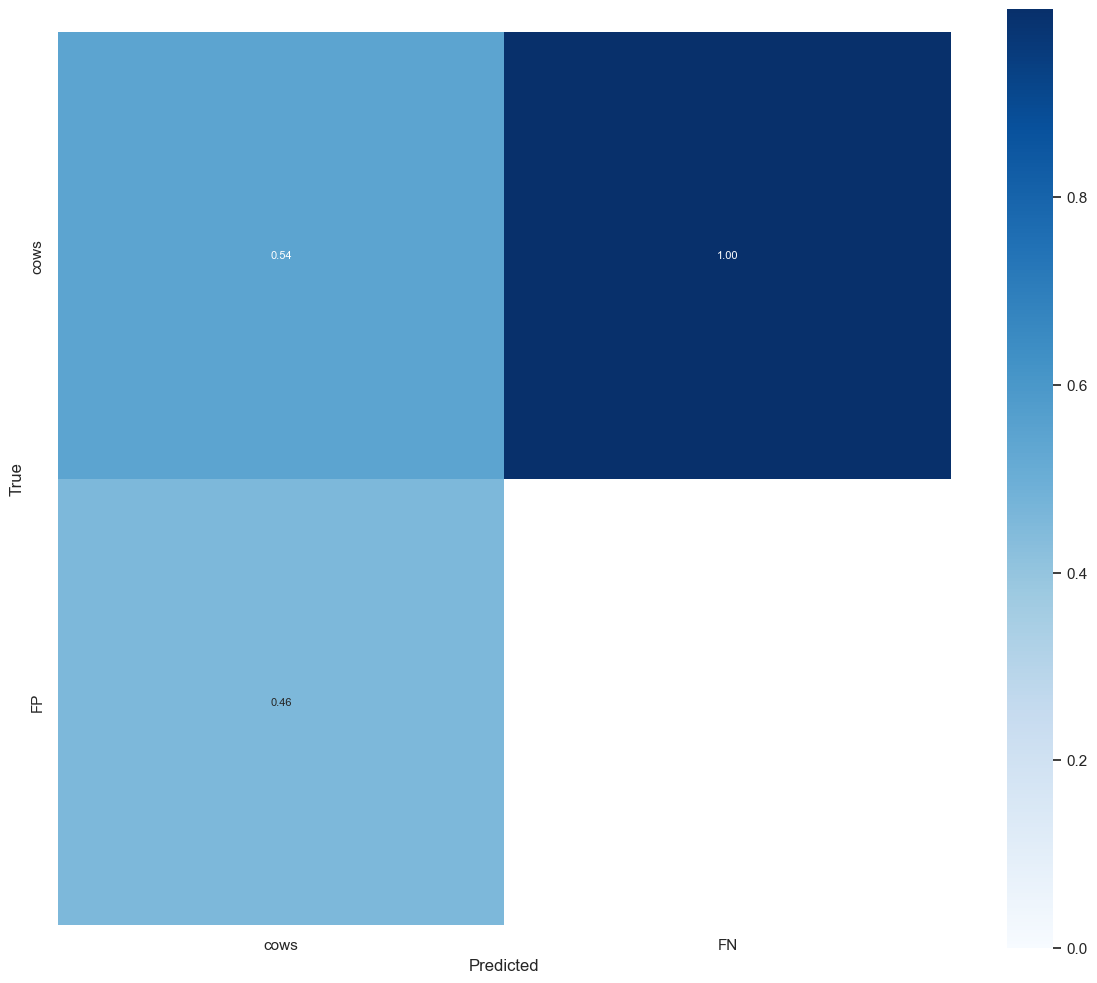

In [6]:
my_nas.get_evaluation_matrix(best_model, data_yaml_path)